In [0]:
#import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

In [0]:
# kosmetyczne komendy oraz import danych
sns.set_style('whitegrid')
url = 'https://raw.githubusercontent.com/wizzy83/colab/master/CommViolPredUnnormalizedData.txt'
df_pi = pd.read_csv(url, header=None, na_values='?') # df_pi -> dataframe przed imputacją
df = pd.read_csv(url, header=None, na_values='?')


In [0]:
df_pi.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,3,8.3,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,3217.7,3.31,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,974.2,0.38,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,NaN,NaN,4.0,32.04,14.0,112.14,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [0]:
df_pi.info()
df_pi.describe()

# 2215 obserwacji, 147 kolumn, statystki opisowe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, 0 to 146
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146
count,994.000000,991.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2214.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,3.430000e+02,3.430000e+02,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,2215.000000,2215.000000,2215.000000,343.000000,3.430000e+02,343.000000,343.000000,2215.000000,3.430000e+02,2215.000000,2215.000000,2007.000000,2007.00000,2214.000000,2214.000000,2202.000000,2202.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2124.000000,2124.000000,1994.000000,2118.000000
mean,65.587525,45209.251261,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,4.773472e+04,70.465309,33984.696163,78.312758,0.881842,43.750935,26.409418,6.801445,15.969002,39857.055079,15603.524605,16567.698420,11541.749436,12229.191422,14227.989616,9442.765131,11018.998194,7.590853e+03,11.620537,9.186646,22.305120,23.056876,6.045242,62.021612,18.228907,24.532298,13.819165,...,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767,0.681283,15.242245,26.288630,8.816327,119.114286,27.419955,2783.835034,3.041124,185.478134,3.217602e+07,87.130933,4.285714,0.980163,1.535779e+05,7.764786,5.859296,28.046338,36.25848,237.952123,162.612597,326.528156,378.004605,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,117.831399,25425.861573,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,2.056067e+05,44.080275,13424.680011,7.950672,0.689006,12.787925,8.295604,4.700335,4.622553,14251.206032,6281.558523,6346.840251,9232.102062,14853.836177,9881.266395,7926.466713,5884.063446,3.936146e+04,8.600352,6.666703,10.989517,12.687213,2.895618,8.312045,8.099281,6.659470,6.430264,...,6.894498e+05,1.482113e+05,307.839007,273.798409,10.941312,15.332612,11.021424,10.604533,1.706344,14.826756,100.821921,2.836391,92.495186,109.822600,2828.993341,4.912917,318.542834,1.104566e+08,10.349612,4.064538,2.877128,2.030409e+05,58.166468,9.156829,105.616135,34.23975,2250.720788,234.486624,1987.947941,438.238599,3111.702756,763.354442,7600.573464,1901.316145,3258.164244,504.666026,180.125248,39.240900,614.784518,2739.708901
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,0.000000e+00,0.000000,8866.000000,31.680000,0.000000,5.810000,4.810000,0.180000,3.460000,10447.000000,5237.000000,5472.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.800000e+01,0.640000,0.200000,1.460000,1.630000,1.320000,24.820000,2.050000,8.690000,1.370000,...,2.100000e+03,2.704800e+03,20.800000,29.400000,42.150000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.900000,10.000000,0.000000,20.000000,2.380215e+06,10.850000,0.000000,0.000000,1.526040e+04,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,11.000000,22887.000000,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,0.000000e+00,0.000000,23817.000000,73.400000,0.460000,34.680000,20.770000,3.270000,12.875000,29538.000000,11602.500000,12610.5000

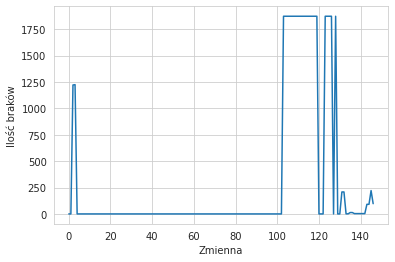

In [0]:
# braki danych
braki = df_pi.isnull()
braki_series = braki.sum()

plt.plot(braki_series.index, braki_series)
plt.xlabel('Zmienna')
plt.ylabel('Ilość braków')
plt.show()

Text(0.5, 1.0, 'braki danych')

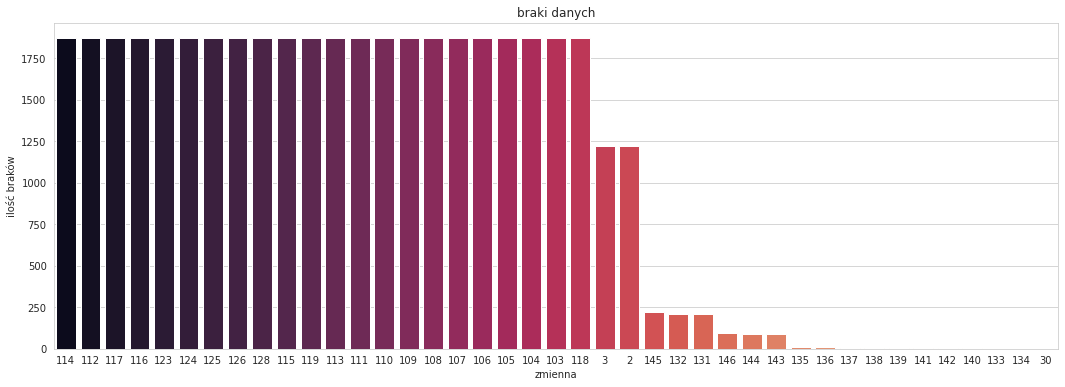

In [0]:
# braki danych po kolumnie
plt.figure(figsize=(18,6))
sns.barplot(x=braki_series.sort_values(ascending=False)[braki_series.sort_values(ascending=False)>0].index.astype('str'),
            y=braki_series.sort_values(ascending=False)[braki_series.sort_values(ascending=False)>0],
            order=braki_series.sort_values(ascending=False)[braki_series.sort_values(ascending=False)>0].index.astype('str'),
            palette='rocket')
plt.xlabel('zmienna')
plt.ylabel('ilość braków')
plt.title('braki danych')

Text(0.5, 1.0, 'zmienne z brakami <500 obserwacji')

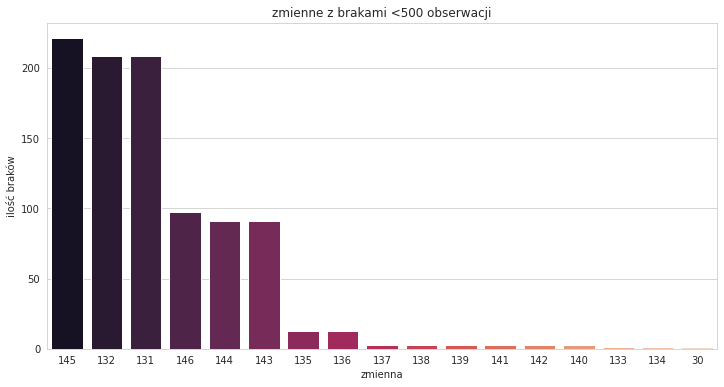

In [0]:
# braki danych 'imputowalne' (mniej 500 braków)
plt.figure(figsize=(12,6))
sns.barplot(x=braki_series.sort_values(ascending=False)
[(braki_series.sort_values(ascending=False)>0) & (braki_series.sort_values(ascending=False)<500)].index.astype('str'),
            y=braki_series.sort_values(ascending=False)
            [(braki_series.sort_values(ascending=False)>0) & (braki_series.sort_values(ascending=False)<500)],
            order=braki_series.sort_values(ascending=False)
            [(braki_series.sort_values(ascending=False)>0)
             & (braki_series.sort_values(ascending=False)<500)].index.astype('str'),
            palette='rocket')
plt.xlabel('zmienna')
plt.ylabel('ilość braków')
plt.title('zmienne z brakami <500 obserwacji')

In [0]:
print('zmienna 140 - ilość kradzieży na 100k mieszkańców ma',braki_series[140], 'brakujących obserwacji')

zmienna 140 - ilość kradzieży na 100k mieszkańców ma 3 brakujących obserwacji


Imputacja metodą hot-deck, za pomocą algorytmu najbliższych sąsiadów - imputujemy wartością z tej samej kolumny dla innego reokrdu, identyfikując pobliskie rekordy w wielowymiarowej przestrzeni odległością euklidesową

In [0]:
# zmienna 140 posiada braki, chociaz sa to pojedyncze obserwacje, uniemozliwia to estymowania obserwacji zmiennej 146 metodą regeresji bez elemetnu stochastycznego
# imputacja brakow w zmiennej 140 metoda najblizszych sasiadow
# zmienna to 

imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_knn_imputed = imputer.fit_transform(df_pi.iloc[:,2:])
df[140] = df_knn_imputed[:,138]

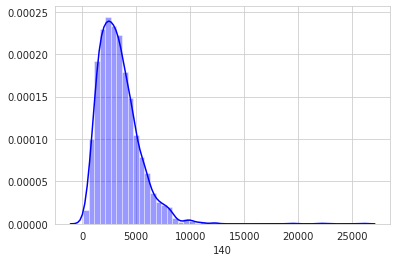

In [0]:
sns.distplot(df_pi.loc[:,140], color='blue') # wykres zmiennej 140 przed imuptacją

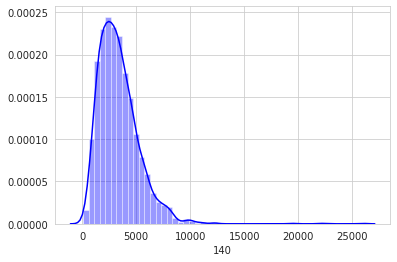

In [0]:
sns.distplot(df.loc[:,140], color='blue') # wykres zmiennej 140 po imputacji

In [0]:
df_pi.loc[:,140].describe()

count     2212.000000
mean      3372.979150
std       1901.316145
min         77.860000
25%       2040.080000
50%       3079.510000
75%       4335.410000
max      25910.550000
Name: 140, dtype: float64

In [0]:
df.loc[:,140].describe()

count     2215.000000
mean      3374.196956
std       1900.822503
min         77.860000
25%       2040.740000
50%       3081.290000
75%       4338.290000
max      25910.550000
Name: 140, dtype: float64

Dystrybucja i statystyki opisowej zmienne 140 (ilość kradzieży na 100k mieszkańców) po impituacji metodą hot-deck KNN nie zmieniła się znacząco, średnia i mediana wzrosły marginalnie, a odchylenie standardowe zmalało (zmiany o mniej niż <0,15%). Przed imputacją były 3 braki danych, co stanowi około 0,14% wszystkich obserwacji. Imputowanie tej zmiennej jest potrzebne do zaimputowania metodą regresji kolejne zmiennej z większą ilością braków

**Imputacja zmienne 146 -> liczba niebrutalnych przestępstw na 100k mieszkańców**

count     2118.000000
mean      4908.241804
std       2739.708901
min        116.790000
25%       2918.070000
50%       4425.450000
75%       6229.280000
max      27119.760000
Name: 146, dtype: float64

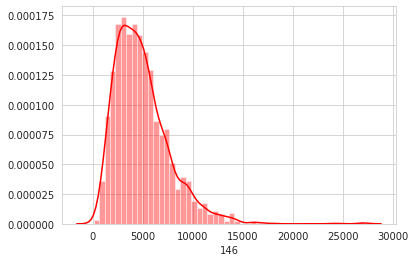

In [0]:
# imputacja zmiennej 146
# zmienna -> liczba nie-brutalnych przestępstw na 100k mieszkańców
# rozklad zmiennej
sns.distplot(df.loc[:,146], color='red')

# statystyki opisowe zmiennej przed imputacją
df.loc[:,146].describe()

In [0]:
# korelacje
df.corr().loc[:,146].sort_values(ascending=False)
# zmienna bardzo silnie koreluje ze zmienna 140 (P=0,94) -> liczba kradziezy na 100k mieszkańców

146    1.000000
140    0.940969
138    0.808885
145    0.675374
134    0.626270
         ...   
72    -0.505299
50    -0.615673
51    -0.622792
48    -0.662120
49    -0.669238
Name: 146, Length: 145, dtype: float64

In [0]:
wartosc_bez_null = df[[140,146]][df[[140,146]].notnull()].dropna() # zapis zmiennych potrzebny do modelu regeresji (bez obserwacji brakujących)

In [0]:
# imputowanie 97 brakow zmiennej 146 (nie-brutalne przestepstwa na 100k mieszkancow) za pomoca regresji bez elementu stochastycznego
nulle = df[140][df[146].isnull()] # wartosc zmiennej 140 (tutaj egzogenicznej) do zaimputowania
model = LinearRegression()
model = model.fit(X=wartosc_bez_null[140].values.reshape(-1,1), y=wartosc_bez_null[146].values.reshape(-1,1))
yhat = model.predict(nulle.values.reshape(-1,1))
keys = list(df[146][df[146].isnull()].index)
values = list(yhat.flatten())
d = dict(zip(keys, values))
df[146].fillna(value=d, inplace=True)


count     2215.000000
mean      4920.326951
std       2714.175654
min        116.790000
25%       2956.720000
50%       4473.190000
75%       6242.820000
max      27119.760000
Name: 146, dtype: float64

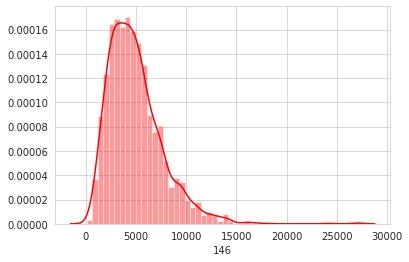

In [0]:
# rozklad zmiennej po imputacji
sns.distplot(df.loc[:,146], color='red')
# statystyki opisowe zmiennej po imputacji
df.loc[:,146].describe()

97 (około 5% wszystkich obserwacji) zaimputowanych wartości zmiennej 146 -> ilość przestępstw bez przemocy na 100k mieszkańców', za pomocą regresji bez elementu losowegu, gdzie zmienną objaśniającą była najbardziej skorelowana zmienna -> 'ilość kradzieży na 100k mieszkańców'. Dla rozkładu zmiennej 146 spowodowało to:
- średnia wzrosła o około 12 przestępst bez przemocy na 100k mieszkańców, relatywnie o około 0,2%, 
- mediana wzrosła o około 48 przestępst bez przemocy na 100k mieszkańców, relatywnie o około 1,1%, 
- odchylenie standardowe spadło o około 26 przestępst bez przemocy na 100k mieszkańców, relatywnie o około 0,9%,

**Kolejne zmienne, które zostaną zaimputowane metodą hot-deck (algorytmem KNN) to zmienna 143 oraz 144, obie mają 91 brakujących obserwacji
- zmienna 143 to ilość podpaleń w roku 1995
- zmienna 144 to ilość podpaleń na 100k mieszkańców**

count    2124.000000
mean       30.907721
std       180.125248
min         0.000000
25%         1.000000
50%         5.000000
75%        16.000000
max      5119.000000
Name: 143, dtype: float64

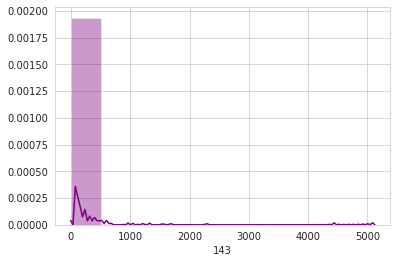

In [0]:
# rozklad zmiennej 143 przed imputacją
sns.distplot(df_pi.loc[:,143], color='purple', bins=10)
# statystyki opisowe zmiennej 143 przed imputacją
df_pi.loc[:,143].describe()

count    2124.000000
mean       32.153682
std        39.240900
min         0.000000
25%         7.670000
50%        21.080000
75%        42.852500
max       436.370000
Name: 144, dtype: float64

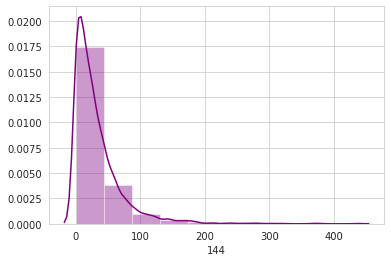

In [0]:
# rozklad zmiennej 144 przed imputacją
sns.distplot(df_pi.loc[:,144], color='purple', bins=10)
# statystyki opisowe zmiennej 144 przed imputacją
df_pi.loc[:,144].describe()

**Średnia ilość podpaleń na jednostkę badania 'społeczność' (miejscowość, osiedle) to tylko 31, jednak odchylenie standardowe to aż 180, istnieje bardzo duże rozproszenie pomiędzy więszkością zbioru a obserwacjami odstającymi. Maksymalna wartość to 5119 podpaleń'**

In [0]:
# imputacja brakow obserwacjami najblizszymi w wielowymiarowej przestrzeni
imputer = KNNImputer(n_neighbors=3, weights='uniform')
df_knn_imputed = imputer.fit_transform(df.iloc[:,2:])
df[143] = df_knn_imputed[:,141]
df[144] = df_knn_imputed[:,142]

count    2215.000000
mean       30.554703
std       176.755162
min         0.000000
25%         1.000000
50%         5.000000
75%        16.000000
max      5119.000000
Name: 143, dtype: float64

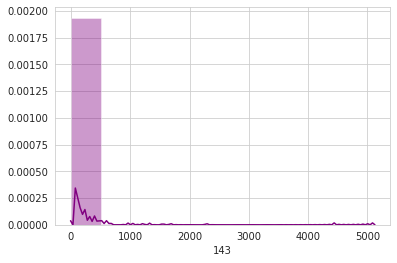

In [0]:
# rozklad zmiennej 143 po imputacją
sns.distplot(df.loc[:,143], color='purple', bins=10)
# statystyki opisowe zmiennej 143 po imputacją
df.loc[:,143].describe()

count    2215.000000
mean       32.181502
std        38.779913
min         0.000000
25%         7.905000
50%        21.510000
75%        42.740000
max       436.370000
Name: 144, dtype: float64

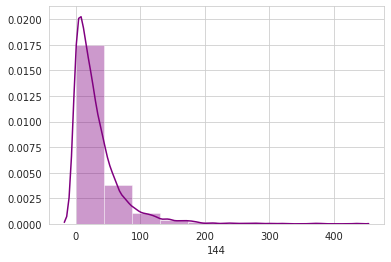

In [0]:
# rozklad zmiennej 144 po imputacją
sns.distplot(df.loc[:,144], color='purple', bins=10)
# statystyki opisowe zmiennej 144 po imputacją
df.loc[:,144].describe()

91 (około 4% wszystkich obserwacji) zaimputowanych wartości zmiennej 143 -> ilość podpaleń w roku 1995' oraz zmiennej 144 ->ilość podpaleń na 100k mieszkańców (nie tylko w roku 1995) za pomocą metody hot-deck algorytmem KNN. Dla rozkładów zmiennych spowodowało to:
- średnia ilość podpaleń na społeczność w roku 1995 spadła 0,35 (1,1%), a średnia ilość podpaleń na 100k mieszkańców wzrosła o 0,03 (0,1%), oznacza to, że prawdopodobnie można by otrzymać lepsze wyniki dzieląć liczbę pożarów i podzielić ją przez wielkość populacji danego społeczeńśtwa. Jednak najpierw należałoby sprawdzić czy miary te są spójne dla nieimputowanych obserwacji
- mediana podpaleń nie zmieniła się, a mediana podpaleń na 100k mieszkańców wzrosła o 0,43 podpaleń (2%), 
- odchylenie standardowe spadło o około 3,37 podpaleń (1,9%), a odchylenie podpaleń na 100k mieszkańców spadło o około 0,46 (1,2%),

**Normalizacja (standaryzacja)**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
normalizacja_1 = StandardScaler()

In [0]:
df_n1 = pd.DataFrame(normalizacja_1.fit_transform(df.iloc[:, 2:]))

**Wartości oraz histogram dla zmiennej 47 - średnia ilość osób w gospodarstwie domowym w danej miejscowości**

In [0]:
df.iloc[:,47].describe()

count    2215.000000
mean        3.129698
std         0.240743
min         2.290000
25%         2.990000
50%         3.100000
75%         3.220000
max         4.640000
Name: 47, dtype: float64

In [0]:
df_n1.iloc[:, 45].describe()

count    2.215000e+03
mean    -1.604786e-15
std      1.000226e+00
min     -3.488736e+00
25%     -5.804088e-01
50%     -1.233859e-01
75%      3.751846e-01
max      6.274935e+00
Name: 45, dtype: float64

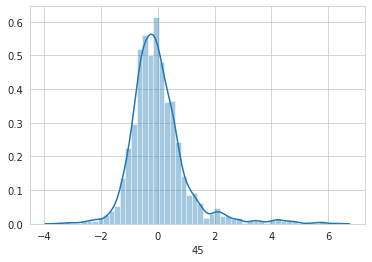

In [0]:
sns.distplot(df_n1.iloc[:,45])

Normalizacja min-max 

X_std = (X - X.min) / (X.max - X.min)

X_scaled = X_std * (max - min) + min

In [0]:
from sklearn.preprocessing import MinMaxScaler
normalizacja_2 = MinMaxScaler()
df_n2 = pd.DataFrame(normalizacja_2.fit_transform(df.iloc[:,2:]))

In [0]:
df_n2.iloc[:,45].describe()

count    2215.000000
mean        0.357318
std         0.102444
min         0.000000
25%         0.297872
50%         0.344681
75%         0.395745
max         1.000000
Name: 45, dtype: float64

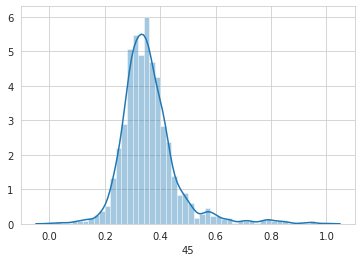

In [0]:
sns.distplot(df_n2.iloc[:,45])

Normalizaca - Robust Scaler - normalizuje zmienne zamiast na podstawie minimalnych i maksymalnych wartości, to na podstawie przedzialu z pierwszego i trzeciego kwartyla, metoda dobra przy danych z odstającymi obserwacjami

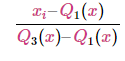



In [0]:
from sklearn.preprocessing import RobustScaler
normalizacja_3 = RobustScaler()
df_n3 = pd.DataFrame(normalizacja_3.fit_transform(df.iloc[:,2:]))

In [0]:
df_n3.iloc[:,45].describe()

count    2215.000000
mean        0.129120
std         1.046707
min        -3.521739
25%        -0.478261
50%         0.000000
75%         0.521739
max         6.695652
Name: 45, dtype: float64

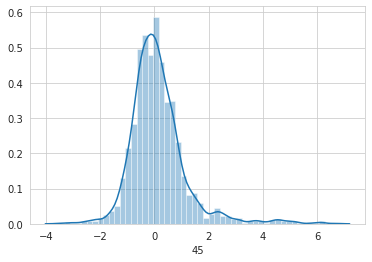

In [0]:
sns.distplot(df_n3.iloc[:,45])

Normalizacja na podstawie wielowymiarowej przestrzeni

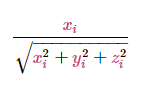

In [0]:
from sklearn.preprocessing import Normalizer
normalizacja_4 = Normalizer()
df_n4 = pd.DataFrame(normalizacja_4.fit_transform(df.iloc[:,2:]))

ValueError: ignored

**Nie jest to możliwe w przypadku braków w danych, użyjem tylko zmiennej 49 oraz dwoch zaimpurtowanych wcześniej zmiennych**

In [0]:
df_n4 = pd.DataFrame(normalizacja_4.fit_transform(df.iloc[:,[47, 140, 146]]))

In [0]:
df_n4.iloc[:,0].describe()

count    2215.000000
mean        0.000730
std         0.000719
min         0.000084
25%         0.000408
50%         0.000566
75%         0.000866
max         0.024287
Name: 0, dtype: float64

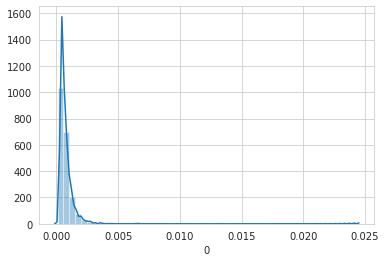

In [0]:
sns.distplot(df_n4.iloc[:,0])